In [1]:
from datascience import *
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use("Agg", warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 1.
Develop a question of your choice that can be addressed by identifying, collecting, and analyzing relevant data. You need to find relevant data by yourself, and describe the data such as the source,  attributes,  size,  how the data were collected, is the dataset sample data or population data?,etc.  The dataset should have at least six distinct variables (i.e. columns) and a sample size (i.e. rows) of 500 or more. (3 points)

>I chose the Housing dataset on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) that has two data files - train.csv and test.csv - used for training and testing the models. I will use the data from train.csv in this project as I am only interested to look at the first 1460 houses in Ames, Iowa. I will split this dataset into training and testing to predict the final sale price of a home. This data set has 81 attributes and 1460 rows, and includes attributes such as Lot Frontage, Lot Area, Neighborhood, Condition, House Style, Year Built, Year Remodeled, Foundation, Total Rooms Above Ground, Garage Type, etc. of residential homes in Ames. For this project; however, I am only interested to look at the relationship between the living area above ground represented by the variable "GrLivArea" and the final sale price of a home represented by the variable "SalePrice". Both of these variables have numeric data types, so it is relatively easier to manipulate the data. This is a population data set. The goal here is to see if a linear relationship exixts between these two variables and if it does, to predict the sale price based on the living area above ground.
#### Project Objective: Can we predict sale price based on living area above ground?

# 2 & 3.
Perform exploratory data analysis (EDA). Describe the EDA process and result with at least four data visualizations.  Explain whether the data is sufficient to answer the question you developed based on EDA result.  If it is not sufficient, how did you address the issue?  (3 points)

Describe any data cleaning or transformations that you perform and why they are motivated by your EDA? (2 point)

In [2]:
train = pd.read_csv("/Users/shristidhakal/Documents/Grad School/INFO5502/Housing/train.csv")
test = pd.read_csv("/Users/shristidhakal/Documents/Grad School/INFO5502/Housing/test.csv")

#### EDA 1: Understanding the Data

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


>One of the keys to effective data analysis is selecting variables that're relevant to your project objective. There are a lot of variables in this data set that I will not need to achieve my project goal, so I will only select the variables that I need. 

#### EDA 2: Variable(s) Selection
Since I'm interested to know the relationship between living area above ground and the sale price, I select the variables "GrLivArea" and "SalePrice" manually, plus the variable "YearBuilt" just to see if this provides any interesting insight in addition to the other two variables. This ensures no redundancy in the data since now there are only three variables and they are very distinct from each other. The data narrowed down after variables selection will be stored in a new variable "all_data", which will be used in rest of the project. 

In [4]:
all_data = train.loc[:,['GrLivArea','SalePrice', 'YearBuilt']]
print(all_data.shape) #Dimensions of the dataframe
all_data.head(5)

(1460, 3)


,GrLivArea,SalePrice,YearBuilt
0,1710,208500,2003
1,1262,181500,1976
2,1786,223500,2001
3,1717,140000,1915
4,2198,250000,2000


In [5]:
all_data.describe() #statistics of the variables

,GrLivArea,SalePrice,YearBuilt
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,180921.195890,1971.267808
std,525.480383,79442.502883,30.202904
min,334.000000,34900.000000,1872.000000
25%,1129.500000,129975.000000,1954.000000
50%,1464.000000,163000.000000,1973.000000
75%,1776.750000,214000.000000,2000.000000
max,5642.000000,755000.000000,2010.000000


>The mean of YearBuilt is 1971.27, which means that we have more data for the recent years; the mean is much closer to the maximum value of 2010 than to the minimum value of 1872. Also, we see that sale price of homes range from 34900 dollars to 755000 dollars and the average is 180921.196 dollars, which is much closer to the min value than the max value. 

#### EDA 3: Checking for Null Values

In [6]:
all_data.isnull().values.any()

False

>Since there are no null values in the data set, there is no need to drop or impute any values.

#### EDA 4: Visualizations and Identifying Outliers

Next, we'll see if a linear relationship exists between GrLivArea and SalePrice or not and check if there are any outliers that are skewing some of the statistics. 

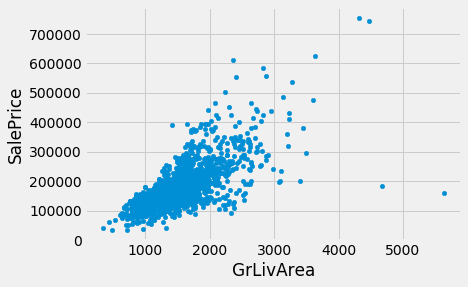

In [7]:
#Scatterplot
all_data.plot.scatter('GrLivArea', 'SalePrice')

>The plot looks more or less linear; however, it appears that there are a couple outliers present towards the bottom right of the plot. If the general pattern is that the sale price of a home increases with the increase in the living area above ground, it is difficult to make sense about what is going on with the two data points at the bottom right because their sale prices are very low given that their respective values for GrLivArea are high. 

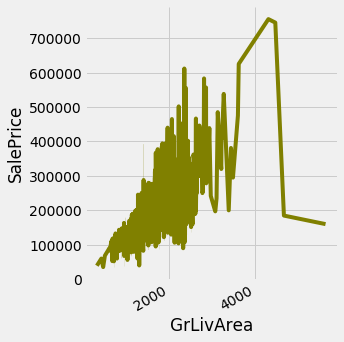

In [8]:
#Lineplot using seaborn
plot = sns.relplot(x="GrLivArea", y="SalePrice", kind="line", color='olive', data=all_data)
plot.fig.autofmt_xdate()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10792bb90>,
      dtype=object)

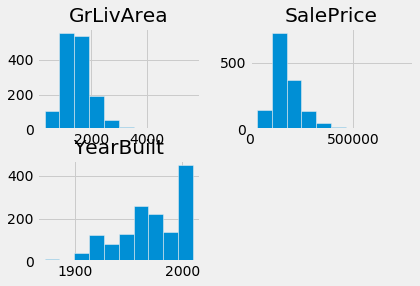

In [9]:
#Histogram
all_data.hist()

>Both GrLivArea and SalePrice have right-tailed histograms with majority values falling towards the left.

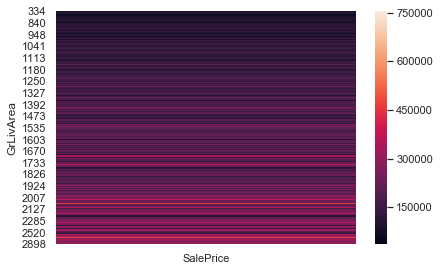

In [10]:
#Heatmap
heatmap_data = all_data.drop(['YearBuilt'],axis=1)
sns.set()
sns.heatmap(heatmap_data.groupby('GrLivArea').mean())

>The heatmap shows the same pattern as the scatterplot i.e. sale price seems to increase as the living area above ground increases.

Let's remove the two outliers and see how the statistics change. 

In [11]:
new_data = all_data[all_data['GrLivArea']<4500]
new_data.describe()

,GrLivArea,SalePrice,YearBuilt
count,1458.000000,1458.000000,1458.000000
mean,1510.465706,180932.919067,1971.218107
std,507.878508,79495.055285,30.193754
min,334.000000,34900.000000,1872.000000
25%,1128.500000,129925.000000,1954.000000
50%,1461.500000,163000.000000,1972.500000
75%,1776.000000,214000.000000,2000.000000
max,4476.000000,755000.000000,2010.000000


>The new statistics after removing the outliers is slightly different than the statistics including those data points. This may not make a lot of difference in the analysis, but it is still better to remove exceptions like this for more interpretable results. So, I'll use the new data without the outliers.

The data seems to be sufficient to answer the question "Can we predict sale price of a home based on the living area of the home above ground?" because we can already see in the visualizations above a linear relationship between GrLivArea and SalePrice. Also, there are 1460 rows of data - this appears to be enough to split into training and validation and get at least satisfactory results.

# 4.
Apply relevant inference or predication methods such as linear regression or K-nearest neighborhood (KNN)to  analyze  your  processed data, and validate the analysis results using cross-validation.  Explain the training  process,  and  the  loss  functions  used  in  the  analysis.   Using  examples (i.e.  the values of the loss functions) to explain how the minimal value(s) of the loss function is/are found.  (7 points)

>I'll use the linear regression prediction method since all data is numeric. However, the data needs to be normalized before using it in modeling so that values in one variable do not overweight the values in other variable(s) leading to inaccurate results. In this case, the unit in which sale prices are measured (U.S. dollars) is different than the unit in which the living area above ground is measured (square ft.), so we do not want sale prices to outweigh the living area values. 

#### Normalization

In [12]:
#Normalizing variables in the range 0 to 20 - Min-max normalization method.
#Min-max normalization subtracts the min. value in the feature and then divides 
#by the range for each feature. The range is the difference between the original 
#maximum and original minimum. This is a good method for preserving the shape of
#the original distribution.

new_data["GrLivArea"]=((new_data["GrLivArea"]-new_data["GrLivArea"].min())/
                        (new_data["GrLivArea"].max()-new_data["GrLivArea"].min()))*20
new_data["SalePrice"]=((new_data["SalePrice"]-new_data["SalePrice"].min())/
                        (new_data["SalePrice"].max()-new_data["SalePrice"].min()))*20
new_data.head(5)

/Users/shristidhakal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/shristidhakal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,GrLivArea,SalePrice,YearBuilt
0,6.644133,4.821553,2003
1,4.480927,4.071657,1976
2,7.011106,5.238161,2001
3,6.677933,2.919039,1915
4,9.000483,5.974170,2000


#### Modeling

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

new_data = new_data.reset_index()
input_var = new_data.filter(['GrLivArea'])
target_var = new_data.filter(['SalePrice'])


In [14]:
#Splitting the data 80/20

X_train, X_test, y_train, y_test = train_test_split(input_var, target_var, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1166, 1) (1166, 1)
(292, 1) (292, 1)


In [15]:
#Fitting the model on the training data and predicting test data

linear_mod = linear_model.LinearRegression() #Running Linear Regression Model
model = linear_mod.fit(X_train, y_train) #Training the model
predictions = linear_mod.predict(X_test) #Making predictions

In [16]:
#Printing the first five predictions on test data

predictions[0:5]

array([[3.44348289],
       [3.68233751],
       [2.6451195 ],
       [2.99849346],
       [2.09542667]])

In [17]:
#Finding R-value to see how much variance in the data is explained by the model
print('Coefficient:', model.coef_)

Coefficient: [[0.67762729]]


>0.65 is not a very strong correlation, but it is not bad either. This means that these variables are more related to each other than not.

In [18]:
#Calculating the Mean Squared Error - Loss Function
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, predictions))

Mean Squared Error: 2.28


In [19]:
#Finding the variance score - higher number in the range 0-1 is better
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.51


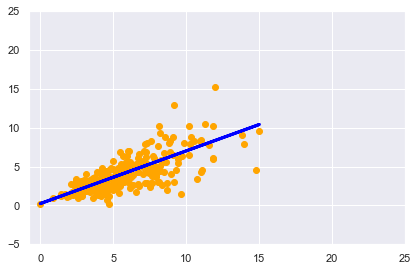

In [20]:
#Visualizing the results of the prediction/ plotting the model

plt.scatter(X_test, y_test,  color='orange')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks((np.arange(0, 30, 5)))
plt.yticks((np.arange(-5, 30, 5)))

plt.show()

In [21]:
print("Score:", model.score(X_test, y_test))

Score: 0.51253988924545


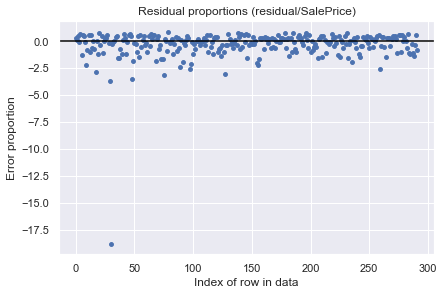

In [22]:
target_test = target_var[:292]

res = target_test - predictions
res_prop = res / target_test
plt.scatter(np.arange(len(res_prop)), res_prop, s=15)
plt.axhline(0, c='black')
plt.title('Residual proportions (residual/SalePrice)')
plt.xlabel('Index of row in data')
plt.ylabel('Error proportion');

This looks like a good enough model. But we don't know how the data was split, specifically we don't know if the split was random enough. I'll use k-fold cross-validation method to validate this.

#### K-Folds Cross Validation

In [23]:
from sklearn.model_selection import KFold 

kf = KFold(n_splits=6)  
kf.get_n_splits(input_var) # Returns the number of splitting iterations in the cross-validator
 
KFold(n_splits=6, random_state=None, shuffle=False)

for train_index, test_index in kf.split(input_var.index):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = input_var[train_index[0]:train_index[-1]], input_var[test_index[0]:test_index[-1]]
    y_train, y_test = target_var[train_index[0]:train_index[-1]], target_var[test_index[0]:test_index[-1]]

TRAIN: [ 243  244  245 ... 1455 1456 1457] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Performing 6-fold cross validation
scores = cross_val_score(model, input_var, target_var, cv=6) 

print('Cross-validated scores:', scores)

Cross-validated scores: [0.57341027 0.55157261 0.58357347 0.52382954 0.57599302 0.3722741 ]


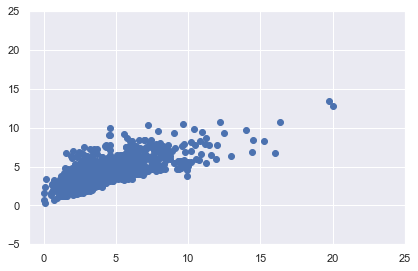

In [25]:
# Visualizing the cross-validated predictions

predictions = cross_val_predict(model, input_var, target_var, cv=6)
plt.scatter(target_var, predictions)

plt.xticks((np.arange(0, 30, 5)))
plt.yticks((np.arange(-5, 30, 5)))

plt.show()

>This scatterplot looks a little different than the earlier scatterplot with the 80/20 data split.

In [26]:
accuracy = metrics.r2_score(target_var, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5374680507296321


>The accuracy score of the earlier model with the 80/20 split (0.577) is more than the accuracy of this model (0.537), so I'll use the original model.

Calculating slope of the original model.

In [27]:
find_slope = make_array(-15, 0)
find_slope = find_slope.reshape(-1, 1)
intercepts = model.predict(find_slope)
intercepts

array([[-9.93401189],
       [ 0.23039744]])

In [28]:
regression_slope = (np.abs(intercepts[0]) + np.abs(intercepts[1]))/(15)
print("Slope of our regression line is",np.round(regression_slope, 2))

Slope of our regression line is [0.68]


In [29]:
#Checking if the slope falls within the 95% confidence interval

from scipy import stats

def correlation(b, label_x, label_y):
    return np.mean(stats.zscore(b.column(label_x))*stats.zscore(b.column(label_y)))

def slope(b, label_x, label_y):
    r = correlation(b, label_x, label_y)
    return r*np.std(b.column(label_y))/np.std(b.column(label_x))

def intercept(b, label_x, label_y):
    return np.mean(b.column(label_y)) - slope(b, label_x, label_y)*np.mean(b.column(label_x))


Slope of our regression line: [0.67762729]
95%-confidence interval for the true slope:
0.6411888506437139 0.6810424503846685


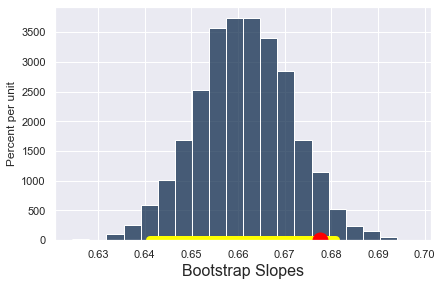

In [30]:
#Bootstrapping slopes using datascience functions

slopes = make_array()
new_data_ds = Table.from_df(new_data) # Switching from pandas to DataScience

for i in np.arange(5000):
    bootstrap_sample = new_data_ds.sample(10000)
    bootstrap_slope = slope(bootstrap_sample, 'GrLivArea', 'SalePrice')
    slopes = np.append(slopes, bootstrap_slope)
Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)

# Setting upper and lower bounds of the confidence interval
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)


plt.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
plt.plot(regression_slope, 0, marker='o', markersize=15, color="red")
print('Slope of our regression line:', regression_slope)
print('95%-confidence interval for the true slope:')
print(left, right)

The regression slope falls inside the interval of the bootstrapped slopes. Thus, this looks like a good enough model to be used for prediction.

#### Loss functions:
#### Mean Squared Error was 2.63.

In [31]:
#Other loss functions
#Minimum Squared Error

def mse_loss(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

mse_loss(26, target_var)

SalePrice    486.414665
dtype: float64

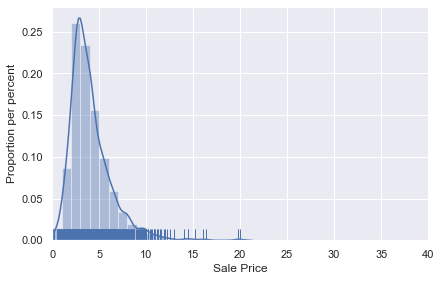

In [32]:
sns.distplot(target_var, bins=np.arange(40), rug=True)
plt.xlim(0, 40)
plt.xlabel('Sale Price')
plt.ylabel('Proportion per percent');

>The sale prices look very low because they are normalized to be in the range 0-20. In the normalized form, the theta should be around 2-3.

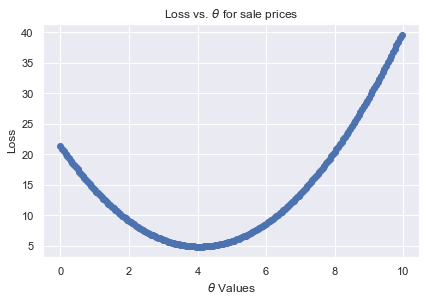

In [33]:
#Calculating theta

thetas = np.arange(0, 10, 0.05)
losses = [mse_loss(theta, target_var) for theta in thetas]

plt.scatter(thetas, losses)
plt.title(r'Loss vs. $ \theta $ for sale prices')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Loss');

>The value of theta that minimizes loss seems to be 4. I had guessed the theta to be somewhere between 2-3 (in the peak of the distribution), but it turned out to be different, which is fine. 

# 5.

Summarize and interpret your results including at least four data visualizations.  Provide an evaluation of your approach and discuss any limitations of the methods you used.  (2 points)

>I think that I took a pretty reasonable approach to predict the sale prices of homes in Ames based on the living area above ground. I used EDA, 80/20 splits for training and testing, and k-folds cross validation to come up with a good enough Linear Regression Model. The Mean Squared Error(MSE) used to calculate loss function is also one of the simplest and interpretable functions. Plus I also did the additional Minimum Squared Error loss function to calculate ideal theta value.